In [1]:
import sys
from pathlib import Path

work_dir = str(Path.cwd().parent)
if work_dir not in sys.path:
    sys.path.append(work_dir)

In [2]:
from no_wander.datasets import read_dataset
from no_wander.constants import SAMPLE_RATE

SAMPLE_SIZE = SAMPLE_RATE // 2
DATA_FILE_TRAINING = '../data/epochs/1572178629-1578573846-train.h5'
X, Y, FEATURES = read_dataset(DATA_FILE_TRAINING, SAMPLE_SIZE)

NUM_FEATURES = len(FEATURES)
NUM_SAMPLES = 6

print('Number of samples in set:', len(X))
print('All seen features:', FEATURES)

Number of samples in set: 14445
All seen features: ['EEG_TP9', 'EEG_AF7', 'EEG_AF8', 'EEG_TP10', 'EEG_Right_AUX', 'ACC_X', 'ACC_Y', 'ACC_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'PPG_PPG1', 'PPG_PPG2', 'PPG_PPG3']


In [3]:
from no_wander.extract import extract_eeg_features

X_eeg, FEATURES_EEG = extract_eeg_features(X, FEATURES)
NUM_FEATURES_EEG = len(FEATURES_EEG)

print('EEG features:', FEATURES_EEG)

    Using multitaper spectrum estimation with 7 DPSS windows


/opt/conda/lib/python3.7/site-packages/pywt/_multilevel.py:45: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


EEG features: ['TP9_mean', 'AF7_mean', 'AF8_mean', 'TP10_mean', 'Right_AUX_mean', 'TP9_var', 'AF7_var', 'AF8_var', 'TP10_var', 'Right_AUX_var', 'TP9_stddev', 'AF7_stddev', 'AF8_stddev', 'TP10_stddev', 'Right_AUX_stddev', 'TP9_skew', 'AF7_skew', 'AF8_skew', 'TP10_skew', 'Right_AUX_skew', 'TP9_kurtosis', 'AF7_kurtosis', 'AF8_kurtosis', 'TP10_kurtosis', 'Right_AUX_kurtosis', 'TP9_zero_xings', 'AF7_zero_xings', 'AF8_zero_xings', 'TP10_zero_xings', 'Right_AUX_zero_xings', 'TP9_p2p', 'AF7_p2p', 'AF8_p2p', 'TP10_p2p', 'Right_AUX_p2p', 'TP9_aauc', 'AF7_aauc', 'AF8_aauc', 'TP10_aauc', 'Right_AUX_aauc', 'TP9_delta', 'AF7_delta', 'AF8_delta', 'TP10_delta', 'Right_AUX_delta', 'TP9_theta', 'AF7_theta', 'AF8_theta', 'TP10_theta', 'Right_AUX_theta', 'TP9_alpha', 'AF7_alpha', 'AF8_alpha', 'TP10_alpha', 'Right_AUX_alpha', 'TP9_beta', 'AF7_beta', 'AF8_beta', 'TP10_beta', 'Right_AUX_beta', 'TP9_gamma1', 'AF7_gamma1', 'AF8_gamma1', 'TP10_gamma1', 'Right_AUX_gamma1', 'TP9_gamma2', 'AF7_gamma2', 'AF8_gamma2

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                233600    
_________________________________________________________________
lstm_1_bn (BatchNormalizatio (None, 32)                128       
_________________________________________________________________
lstm_1_dropout (Dropout)     (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_bn (BatchNormalization (None, 32)                128       
_________________________________________________________________
dense_dropout (Dropout)      (None, 32)                0         
_________________________________________________________________
output (Dense)               (None, 1)                

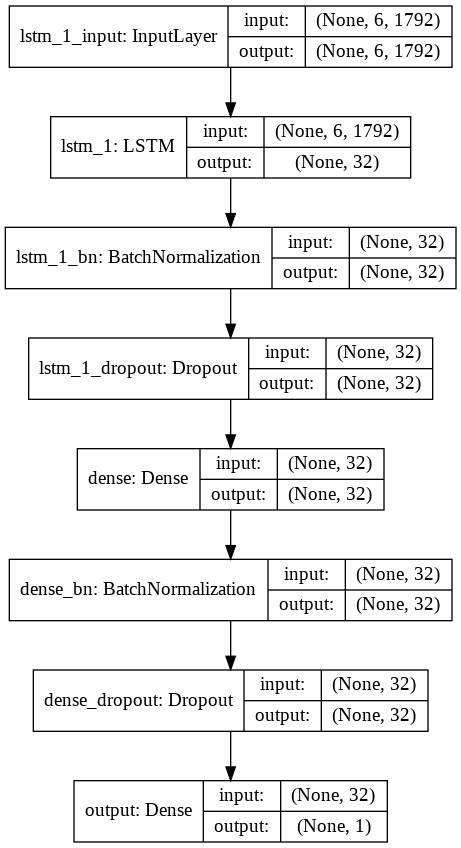

In [4]:
from no_wander.models import get_lstm_model
from keras.utils import plot_model

model_one = get_lstm_model(
    (NUM_SAMPLES, NUM_FEATURES * SAMPLE_SIZE),
    [
        { "units": 32, "dropout": 0.2, "ic_params": { "dropout": 0.2 } },
    ],
    conv1d_params=None,
)
model_one.summary()
plot_model(model_one, to_file='model_one.png', show_shapes=True, show_layer_names=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 64)             475392    
_________________________________________________________________
lstm_1_bn (BatchNormalizatio (None, 6, 64)             256       
_________________________________________________________________
lstm_1_dropout (Dropout)     (None, 6, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
lstm_2_bn (BatchNormalizatio (None, 32)                128       
_________________________________________________________________
lstm_2_dropout (Dropout)     (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)               

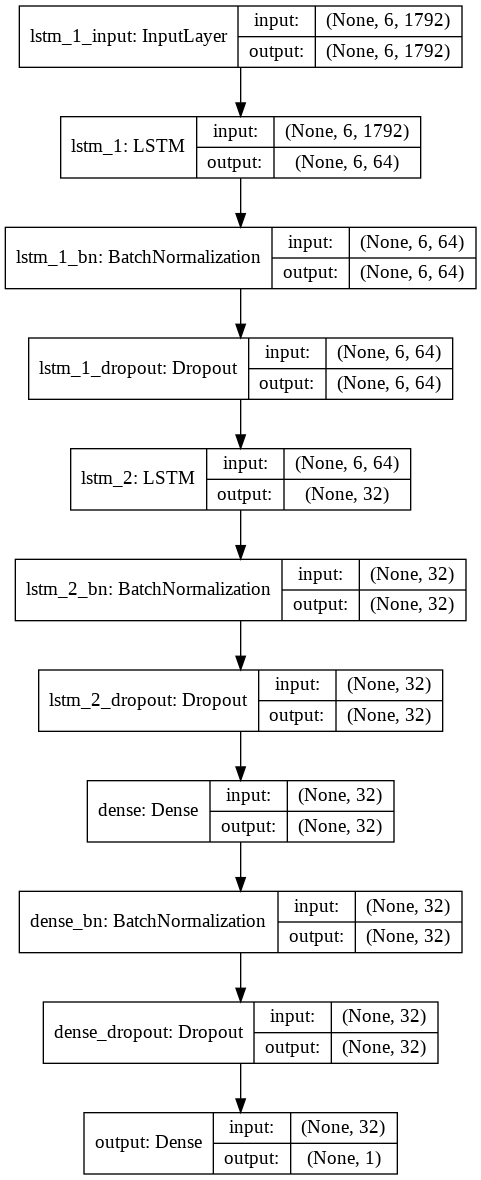

In [5]:
from keras.utils import plot_model

model_two = get_lstm_model(
    (NUM_SAMPLES, NUM_FEATURES * SAMPLE_SIZE),
    [
        { "units": 64, "dropout": 0.2, "ic_params": { "dropout": 0.2 } },
        { "units": 32, "ic_params": { "dropout": 0.2 } },
    ],
    conv1d_params=None,
)
model_two.summary()
plot_model(model_two, to_file='model_two.png', show_shapes=True, show_layer_names=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 189, 128)          27008     
_________________________________________________________________
conv1d_bn (BatchNormalizatio (None, 189, 128)          512       
_________________________________________________________________
conv1d_dropout (Dropout)     (None, 189, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 189, 64)           49408     
_________________________________________________________________
lstm_1_bn (BatchNormalizatio (None, 189, 64)           256       
_________________________________________________________________
lstm_1_dropout (Dropout)     (None, 189, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)               

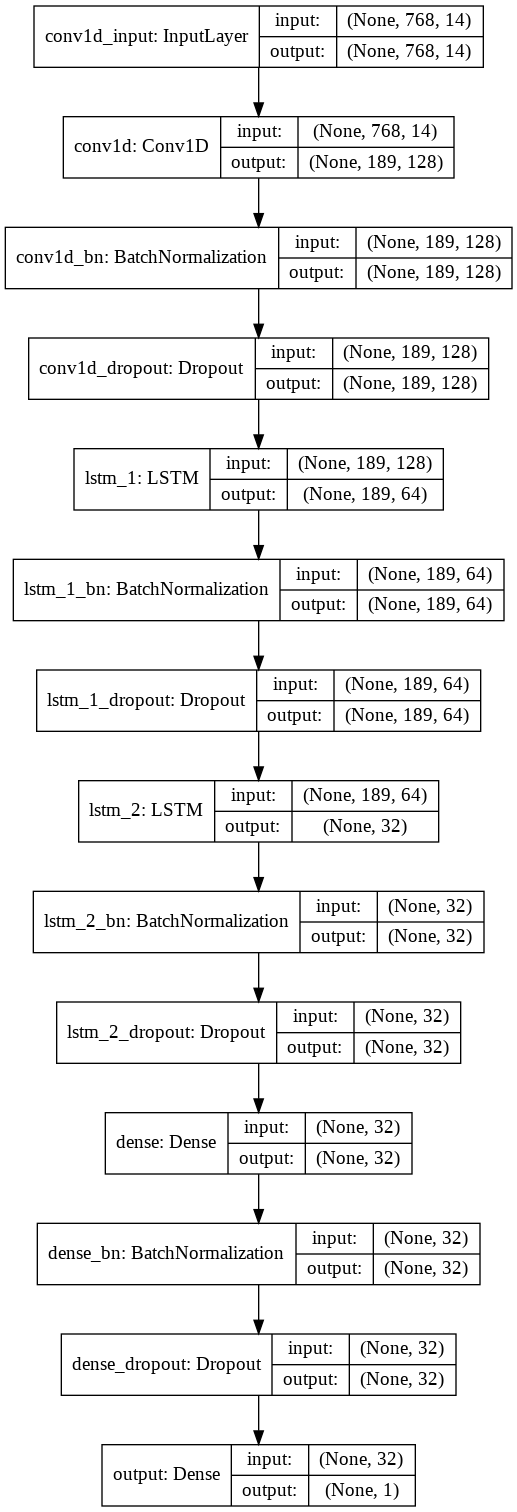

In [6]:
from no_wander.models import get_lstm_model
from keras.utils import plot_model

model_three = get_lstm_model(
    (NUM_SAMPLES * SAMPLE_SIZE, NUM_FEATURES),
    [
        { "units": 64, "dropout": 0, "ic_params": { "dropout": 0.2 } },
        { "units": 32, "ic_params": { "dropout": 0.2 } },
    ],
    conv1d_params={"filters": 128, "kernel_size": 15, "strides": 4},
)
model_three.summary()
plot_model(model_three, to_file='model_three.png', show_shapes=True, show_layer_names=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6, 128)            160256    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 30)                3870      
_________________________________________________________________
output (Dense)               (None, 1)                 31        
Total params: 295,741
Trainable params: 295,741
Non-trainable params: 0
_________________________________________________________________


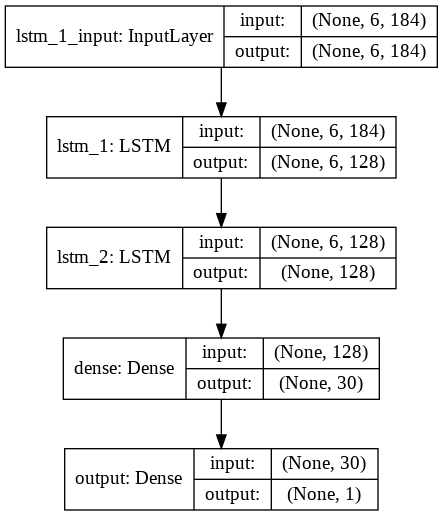

In [7]:
from no_wander.models import get_lstm_model
from keras.utils import plot_model

model_four = get_lstm_model(
    (NUM_SAMPLES, NUM_FEATURES_EEG),
    [
        { "units": 128, "dropout": 0, "ic_params": { "batchnorm": False, "dropout": 0 } },
        { "units": 128, "ic_params": { "batchnorm": False, "dropout": 0 } },
    ],
    dense_params={ "units": 30, "ic_params": { "batchnorm": False, "dropout": 0 } },
)
model_four.summary()
plot_model(model_four, to_file='model_four.png', show_shapes=True, show_layer_names=True)